In [2]:
# !pip install opencv_python==4.5.5.64
# !pip install opencv-contrib-python==4.6.0.66
# !pip install numpy==1.21.2
# !pip install matplotlib==3.5.1

In [35]:
# !pip uninstall numpy -y
# !pip uninstall matplotlib -y

Found existing installation: numpy 1.21.2
Uninstalling numpy-1.21.2:
  Successfully uninstalled numpy-1.21.2
Found existing installation: matplotlib 3.5.1
Uninstalling matplotlib-3.5.1:
  Successfully uninstalled matplotlib-3.5.1


In [37]:
# !pip install numpy
# !pip install matplotlib

In [3]:
#!pip install opencv-python
# !pip install opencv-python

#! apt-get update && apt-get install ffmpeg libsm6 libxext6  -y

In [3]:
import cv2 as cv
import numpy as np

In [4]:
import matplotlib.pyplot as plt

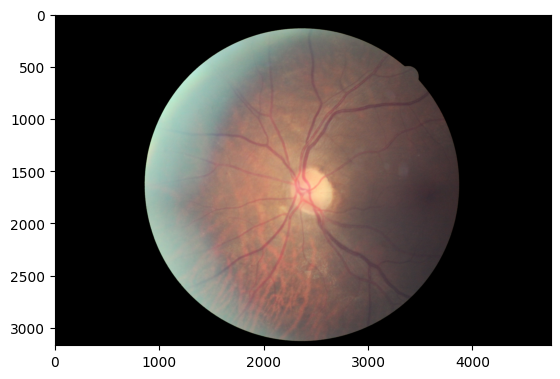

In [14]:
plt.imshow(images[0])

In [4]:
with open('files_test/10_left_2.npy', 'rb') as f:
    raw_saliencyMap = np.load(f)

In [28]:
def preprocess(img, orig_mask, bl_k = 90):
    
    scale = 512
    y1 = np.argmax(orig_mask.sum(2).sum(1)>0) + 2 
    y2 = orig_mask.shape[0] - np.argmax(np.flip(orig_mask.sum(2).sum(1))>0) - 2
    
    mask = np.zeros(img.shape)
    cv.circle(mask, (int(img.shape[1]/2), int(img.shape[0]/2)),
                int(scale/2)-2, (1, 1, 1), -1, 8, 0)
    mask[:y1, :] = 0
    mask[y2:, :] = 0
    
    weighted_img = cv.addWeighted(img, 4, cv.GaussianBlur(img, (0, 0), scale/bl_k), -4, 128)
    processed_img = weighted_img * mask + 128 * (1 - mask)

    

    # To reproduce the saliency map used in the paper,
    # we simulated the processing of saving the processed image in jpeg format and then reading it.
    # These codes can be removed if error or performance degradation is observed.
    processed_img = processed_img.astype(np.uint8)
    _, jpeg = cv.imencode('.jpeg', processed_img)
    processed_img = cv.imdecode(jpeg, cv.IMREAD_COLOR)

    ## work here ## !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    # https://stackoverflow.com/questions/3662361/fill-in-missing-values-with-nearest-neighbour-in-python-numpy-masked-arrays

    ##############################################
    return processed_img

saliency = cv.saliency.StaticSaliencyFineGrained_create()
#saliency = cv.saliency.StaticSaliencySpectralResidual_create()

circle = np.zeros((512, 512))
circle = cv.circle(circle, (256, 256), 240, 1, -1)

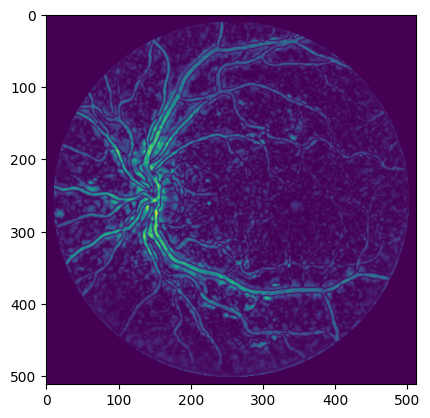

In [21]:
image_init = cv.imread('../mnt/local/data/kalexu97/processed_train/4025_left.jpeg')
image_mask = cv.imread('../mnt/local/data/kalexu97/processed_mask/4025_left.jpeg')
# image_mask = (image_mask.sum(2)>300)*1
image = preprocess(image_init, image_mask)

(_, raw_saliencyMap) = saliency.computeSaliency(image)


offset_2 = 10
scale = 512
y1 = np.argmax(image_mask.sum(2).sum(1)>0)
y2 = image_mask.shape[0] - np.argmax(np.flip(image_mask.sum(2).sum(1))>0)

mask = np.zeros((scale, scale))
cv.circle(mask, (int(scale/2), int(scale/2)),
            int(scale/2)-offset_2, (1, 1, 1), -1, 8, 0)

mask[:y1+offset_2, :] = 0
mask[y2-offset_2:, :] = 0
raw_saliencyMap = raw_saliencyMap*mask

# raw_saliencyMap *= image_mask
plt.imshow(raw_saliencyMap)

In [34]:
from tqdm import tqdm

with open('image_names.npy', 'rb') as f:
    image_names = np.load(f)

processed_path = '../mnt/local/data/kalexu97/processed_train/'
processed_mask = '../mnt/local/data/kalexu97/processed_mask/'
silence_mask_path = '../mnt/local/data/kalexu97/saliency_mask/'

error_filenames = []

first_flag = False

for image_name in tqdm(image_names):

    if first_flag == False:
        if image_name == '15337_left.jpeg':
            first_flag = True
        else:
            continue
    
    img_save_path = processed_path+image_name
    mask_save_path = processed_mask+image_name
    sal_mask_path = silence_mask_path+image_name[:-5]+'.npy'

    #print(image_name)
    #print(sal_mask_path)
    #break

    try:
        image_init = cv.imread(img_save_path)
        image_mask = cv.imread(mask_save_path)
        image_mask_try = (image_mask.sum(2)>300)*1
    except:
        print(image_name)
        error_filenames.append(image_name)
        continue

    
    image = preprocess(image_init, image_mask, bl_k=90)
    
    (_, raw_saliencyMap) = saliency.computeSaliency(image)
    #np.save('files_test/10_left_2.npy', raw_saliencyMap)

    offset_2 = 12
    scale = 512
    y1 = np.argmax(image_mask.sum(2).sum(1)>0)
    y2 = image_mask.shape[0] - np.argmax(np.flip(image_mask.sum(2).sum(1))>0)
    
    mask = np.zeros((scale, scale))
    cv.circle(mask, (int(scale/2), int(scale/2)),
                int(scale/2)-offset_2, (1, 1, 1), -1, 8, 0)
    
    mask[:y1+offset_2, :] = 0
    mask[y2-offset_2:, :] = 0
    raw_saliencyMap = raw_saliencyMap*mask

    
    # raw_saliencyMap *= image_mask

    np.save(sal_mask_path, raw_saliencyMap)

    

  0%|                                                                                                                                                         | 0/35126 [00:00<?, ?it/s][ WARN:0@2956.559] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../mnt/local/data/kalexu97/processed_train/15337_left.jpeg'): can't open/read file: check file path/integrity
[ WARN:0@2956.559] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../mnt/local/data/kalexu97/processed_mask/15337_left.jpeg'): can't open/read file: check file path/integrity
 35%|███████████████████████████████████████████████▋                                                                                         | 12224/35126 [00:00<00:00, 101670.22it/s]

15337_left.jpeg


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 32269/35126 [34:30<04:49,  9.87it/s][ WARN:0@5026.781] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../mnt/local/data/kalexu97/processed_train/40764_right.jpeg'): can't open/read file: check file path/integrity
[ WARN:0@5026.781] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../mnt/local/data/kalexu97/processed_mask/40764_right.jpeg'): can't open/read file: check file path/integrity
 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 32271/35126 [34:30<03:52, 12.26it/s]

40764_right.jpeg


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35126/35126 [39:26<00:00, 14.84it/s]


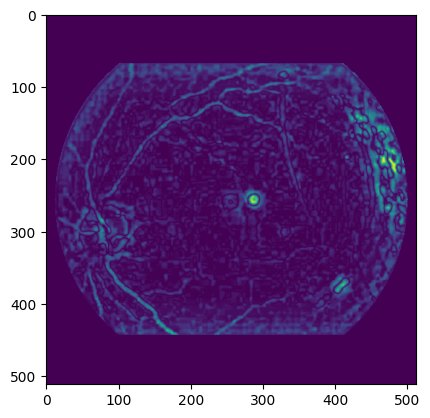

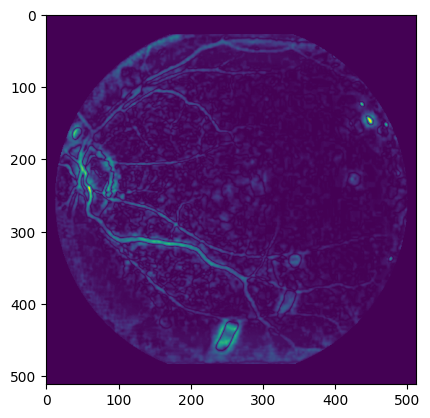

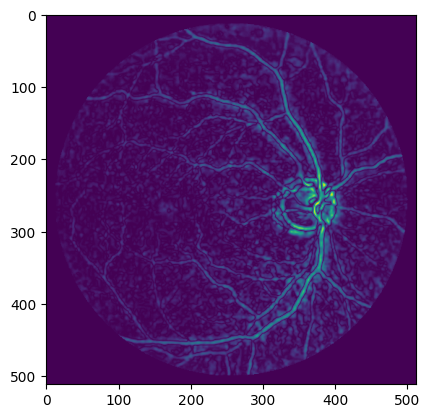

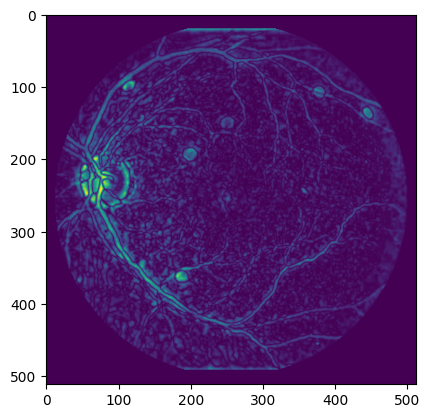

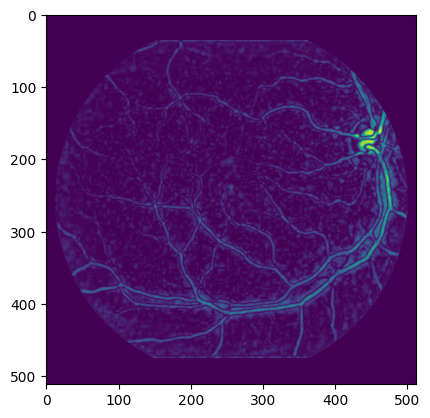

In [31]:
processed_path = '../mnt/local/data/kalexu97/processed_train/'
processed_mask = '../mnt/local/data/kalexu97/processed_mask/'
silence_mask_path = '../mnt/local/data/kalexu97/saliency_mask/'

for image_name in ['10013_right.jpeg', '10014_left.jpeg', '10028_right.jpeg', '10042_left.jpeg', '10031_right.jpeg']:
    img_save_path = processed_path+image_name
    mask_save_path = processed_mask+image_name
    # sal_mask_path = silence_mask_path+image_name[:-5]+'.npy'
    save_s_mask_path = 'files_test/' + image_name

    #print(image_name)
    #print(sal_mask_path)
    #break

    image_init = cv.imread(img_save_path)
    image_mask = cv.imread(mask_save_path)
    # image_mask = (image_mask.sum(2)>300)*1
    
    
    image = preprocess(image_init, image_mask, bl_k=90)
    
    (_, raw_saliencyMap) = saliency.computeSaliency(image)
    #np.save('files_test/10_left_2.npy', raw_saliencyMap)
    # raw_saliencyMap *= image_mask

    offset_2 = 12
    scale = 512
    y1 = np.argmax(image_mask.sum(2).sum(1)>0)
    y2 = image_mask.shape[0] - np.argmax(np.flip(image_mask.sum(2).sum(1))>0)
    
    mask = np.zeros((scale, scale))
    cv.circle(mask, (int(scale/2), int(scale/2)),
                int(scale/2)-offset_2, (1, 1, 1), -1, 8, 0)
    
    mask[:y1+offset_2, :] = 0
    mask[y2-offset_2:, :] = 0
    raw_saliencyMap = raw_saliencyMap*mask

    #cv.imwrite(save_s_mask_path, raw_saliencyMap)
    plt.imshow(raw_saliencyMap)
    plt.show()
    # plt.savefig(save_s_mask_path)

    

(3168, 4752, 3)
(3168,)
848 4440 127 3136
0
4440


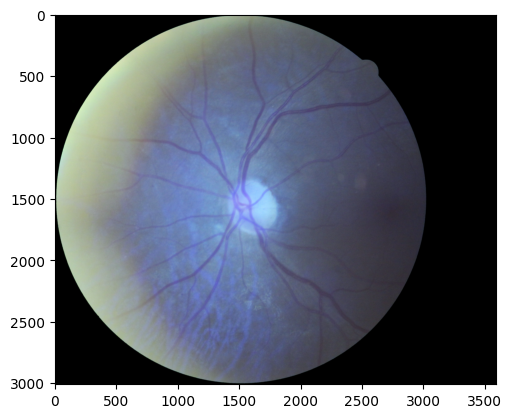

In [58]:
print(image_init.shape)
print(image_init.sum(2).sum(1).shape)
x1 = np.argmax(image_init.sum(2).sum(0)>0)
x2 = image_init.shape[1] - np.argmax(np.flip(image_init.sum(2).sum(0))>0)
cntr_dist1 = image.shape[1]/2 - x1

y1 = np.argmax(image_init.sum(2).sum(1)>0)
y2 = image_init.shape[0] - np.argmax(np.flip(image_init.sum(2).sum(1))>0)

print(x1, x2, y1, y2)
print(np.argmin(image_init.sum(2).sum(0)[:int(image_init.shape[1] - x1)] >0))
#print(image_init.sum(2).sum(0)[:int(image.shape[1]/2 - x1 +100)].shape)

plt.imshow(image_init[y1:y2, x1:x2])
print(x2)


In [4]:
#for el in np.flip(image_init.sum(2).sum(0)):
#    print(el)

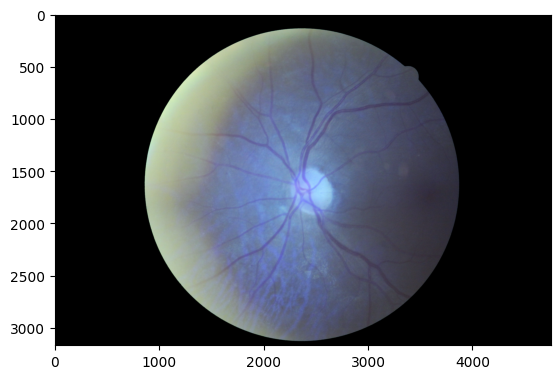

In [36]:
plt.imshow(image_init)

In [ ]:
#cv.imshow('grayscale image',raw_saliencyMap)

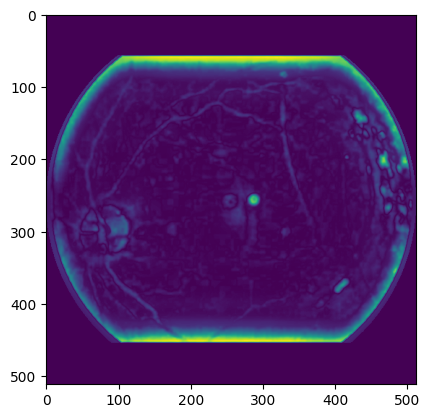

torch.Size([512, 512])


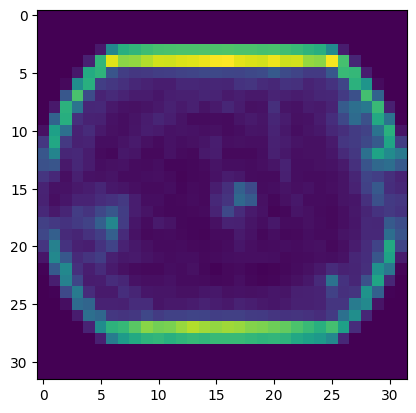

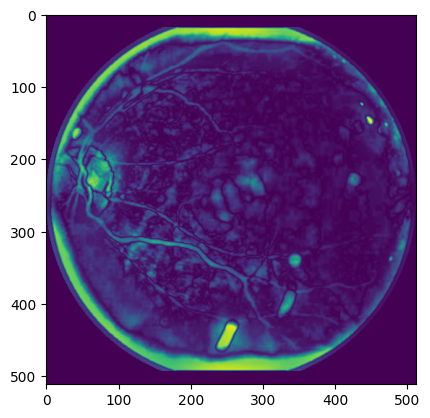

torch.Size([512, 512])


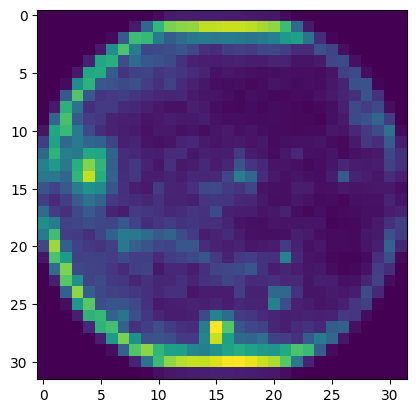

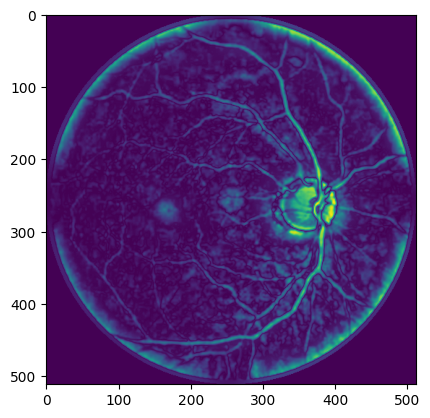

torch.Size([512, 512])


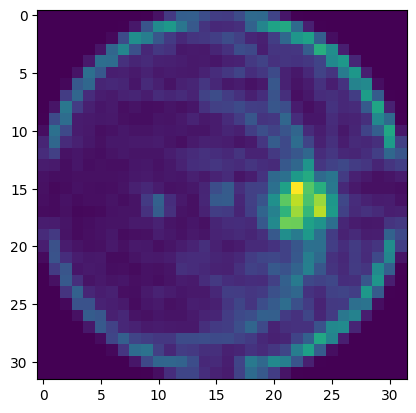

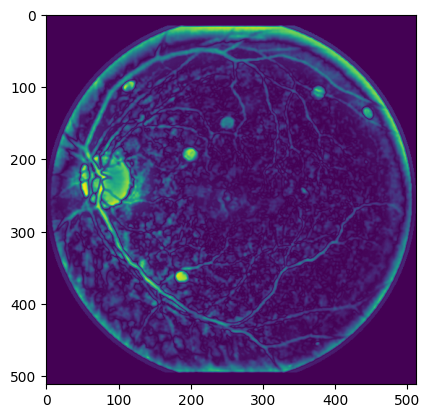

torch.Size([512, 512])


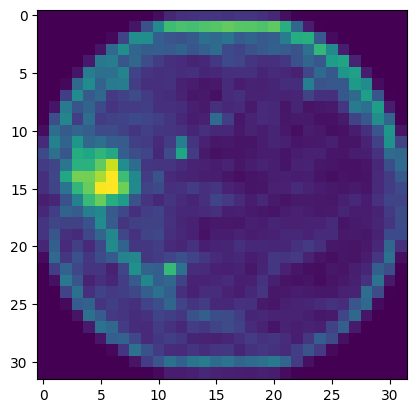

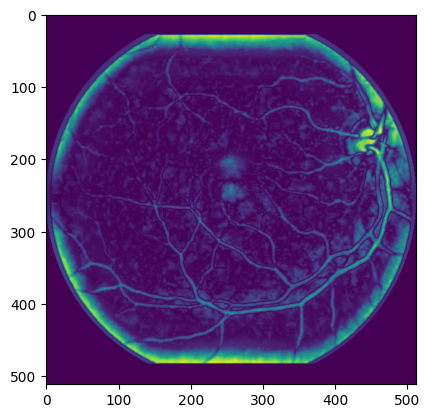

torch.Size([512, 512])


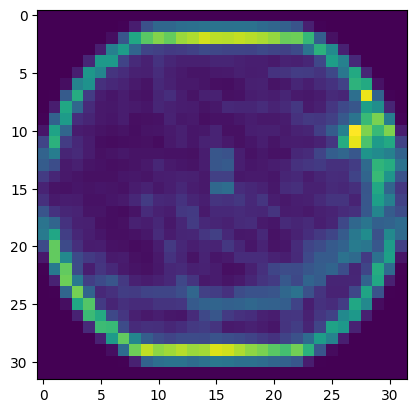

In [12]:
silence_mask_path = '../mnt/local/data/kalexu97/saliency_mask/'

for image_name in ['10013_right.jpeg', '10014_left.jpeg', '10028_right.jpeg', '10042_left.jpeg', '10031_right.jpeg']:
    mask_path = silence_mask_path+image_name[:-5]+'.npy'
    save_s_mask_path = 'files_test/resized_' + image_name

    orig_mask = np.load(mask_path, mmap_mode='r')
    orig_mask = torch.from_numpy(orig_mask)

    mask_size = int(orig_mask.shape[0] // 16)

    plt.imshow(orig_mask)
    plt.show()
    print(orig_mask.shape)

    transform = T.Resize(mask_size)
    resized_mask = transform(orig_mask[None, :, :])
    plt.imshow(resized_mask[0])
    plt.savefig(save_s_mask_path)
    plt.show()
    
    #break    